In [2]:
import scanpy as sc
import numpy as np
import pandas as pd
import anndata as ad
from anndata import AnnData

import random
import leidenalg
import louvain
import time

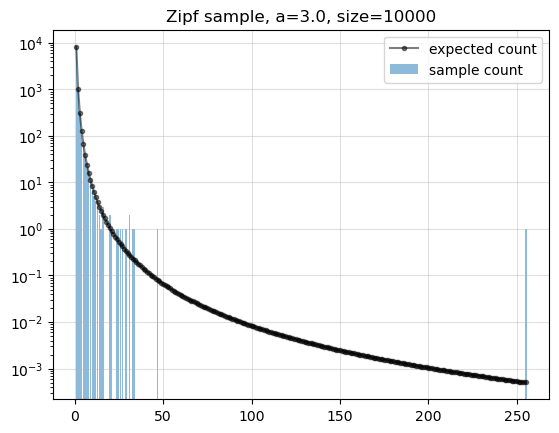

In [13]:
a = 3.
n = 10000
s = np.random.zipf(a, n)
import matplotlib.pyplot as plt
from scipy.special import zeta
count = np.bincount(s)
k = np.arange(1, s.max() + 1)
plt.bar(k, count[1:], alpha=0.5, label='sample count')
plt.plot(k, n*(k**-a)/zeta(a), 'k.-', alpha=0.5,
         label='expected count')   
plt.semilogy()
plt.grid(alpha=0.4)
plt.legend()
plt.title(f'Zipf sample, a={a}, size={n}')
plt.show()

**Create Non_rhythmic Genes**

In [21]:

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Create an AnnData object
adata = sc.AnnData()

# Define the number of cells and genes
n_cells = 1000
n_genes = 100

offset_multiplier = 5
num_cell_types = 2


# Repeat each string n times
offsets = random.choices( range(num_cell_types), k=n_cells)

# Simulate gene expression data
gene_expression_data = np.random.zipf(3, size=(n_cells, n_genes))  # Zipf distribution for sparsity
for i in range(n_genes):
    gene_expression_data[:,i] += (np.array(offsets)*offset_multiplier)
# Create an AnnData object with the simulated data
adata = sc.AnnData(X=gene_expression_data)


**Create Rhythmic Genes**

In [22]:
np.random.seed(42)

# Generate gene expression data for 10 genes from a cosine wave
n_cells = adata.shape[0]
n_new_genes = 12
new_gene_names = [f'NewGene_{i}' for i in range(n_genes+1, n_genes+n_new_genes + 1)]


# Create a cosine wave for each gene
gene_expression_data = np.zeros((n_cells, n_new_genes))
for i in range(n_new_genes):
    # phase = np.random.uniform(0, 2 * np.pi)
    if i < 3:
        phase = np.random.uniform(-1, 1)
        print("phase picked for pos arm: {}".format(phase))
    elif (i == 3):
        phase = 3*np.pi/2 #simulated cry
        print("phase picked for 'cry1': {}".format(phase))

    else:
        phase = np.random.uniform(np.pi-.5, np.pi+.5)
        print("phase picked for neg arm: {}".format(phase))

    amp = np.random.uniform(, 20) #number between 10-20
    noise = np.random.normal(0, 1, n_cells)
    freq = np.pi*2/n_cells
    gene_expression_data[:, i] = amp  *  np.cos(freq * np.arange(n_cells) - phase ) + (np.array(offsets)*offset_multiplier) + noise
    


# Create a new AnnData object for the new genes
new_genes_adata = ad.AnnData(X=gene_expression_data, var=pd.DataFrame(index=new_gene_names))

# Concatenate the new genes with the existing adata
adata2 = ad.concat([adata, new_genes_adata], axis = 1)

phase picked for pos arm: -0.250919762305275
phase picked for pos arm: -0.9368277103487159
phase picked for pos arm: -0.30235893206104136
phase picked for 'cry1': 4.71238898038469
phase picked for neg arm: 2.969476647608052
phase picked for neg arm: 3.575005780613248
phase picked for neg arm: 2.818274967766098
phase picked for neg arm: 2.7060833340456396
phase picked for neg arm: 3.1108956499498
phase picked for neg arm: 3.0066383470659064
phase picked for neg arm: 3.1920230415369137
phase picked for neg arm: 3.4141190767523875


**Plot Synthetic Genes**

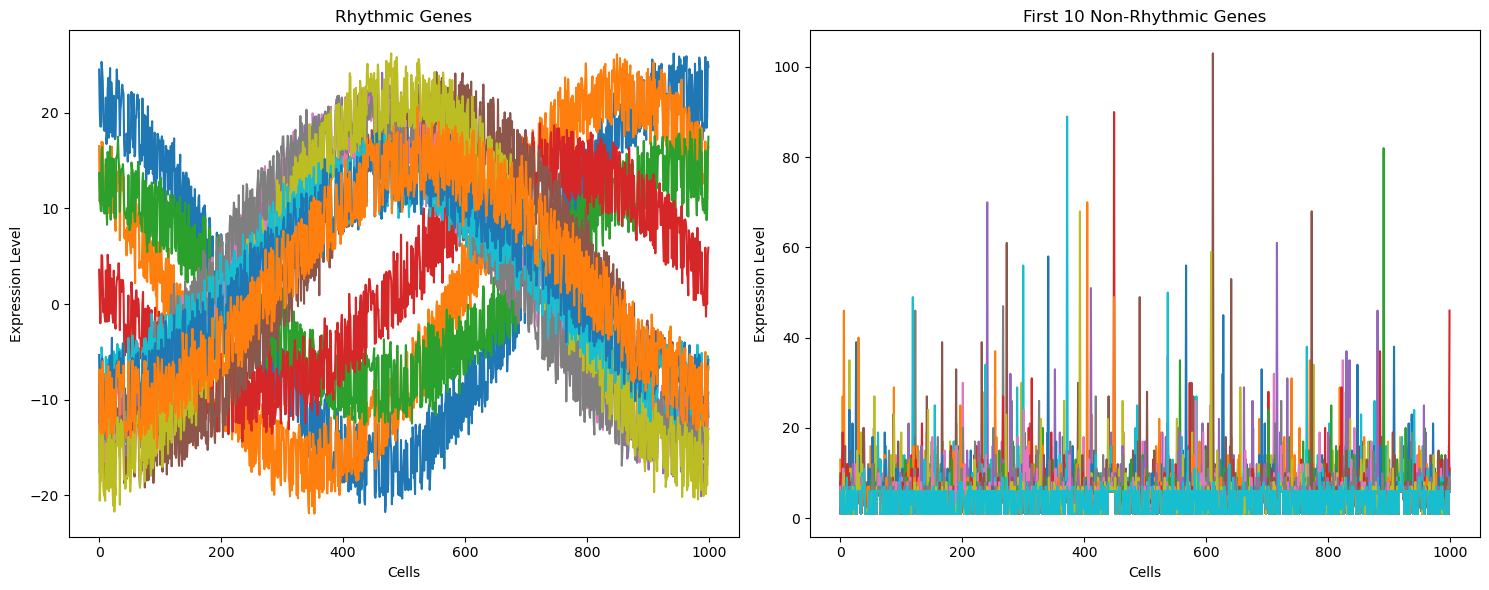

(array([ 4.,  3.,  1.,  0.,  1., 98.,  1.,  2.,  1.,  1.]),
 array([-18.5501993 , -14.83520367, -11.12020803,  -7.4052124 ,
         -3.69021677,   0.02477887,   3.7397745 ,   7.45477013,
         11.16976577,  14.8847614 ,  18.59975703]),
 <BarContainer object of 10 artists>)

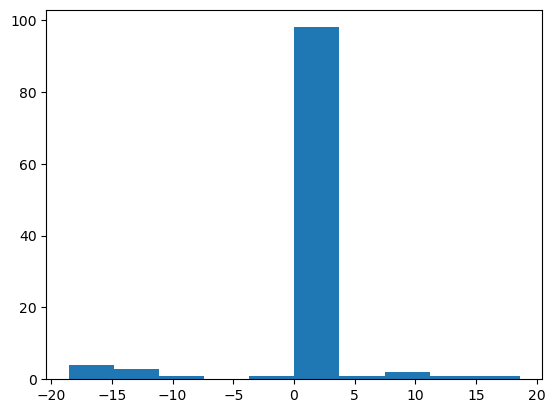

In [25]:
import matplotlib.pyplot as plt

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot rhythmic genes
axes[0].set_title('Rhythmic Genes')
for i in range(n_genes, n_genes+n_new_genes):
    axes[0].plot( adata2.X[:, i], label=f'Gene_{i + 1}')
axes[0].set_xlabel('Cells')
axes[0].set_ylabel('Expression Level')

# Plot non-rhythmic genes
axes[1].set_title('First 10 Non-Rhythmic Genes')
for i in range(0, n_genes):
    axes[1].plot(adata2.X[:, i], label=f'Gene_{i + 1}')
axes[1].set_xlabel('Cells')
axes[1].set_ylabel('Expression Level')
#axes[1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()
plt.hist(adata2.X[2, :])

In [20]:
cell_identities = [f'batch_{i:.2f}' for i in offsets]
# Number of times each string should be repeated
# n = int(n_cells/num_cell_types)

# # Repeat each string n times
# result = [s for s in strings for _ in range(n)]
# cell_identities = result + result
# cell_identities = cell_identities[0:n_cells]
assert(len(cell_identities) == n_cells)

/opt/miniconda3/envs/native/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/miniconda3/envs/native/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/miniconda3/envs/native/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt

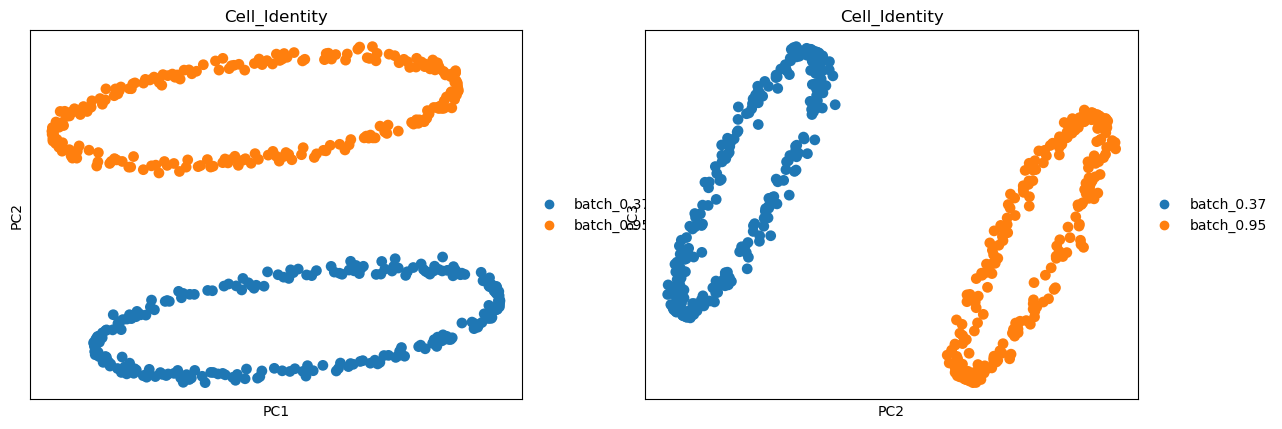

In [21]:
# Perform PCA
sc.tl.pca(adata2)

# Generate random cell identities
#cell_identities = np.random.choice(['Type_A', 'Type_B', 'Type_C'], size=adata2.shape[0])

# # Determine quantiles based on PC3 values
# quantiles = np.percentile(adata2.obsm['X_pca'][:, 2], [0, 25, 50, 75, 100])
# pd.cut(adata2.varm['PCs'][:, 2], bins=[-np.inf] + list(quantiles) + [np.inf], labels=['Type_A', 'Type_B', 'Type_C', 'Type_D', 'Type_E','Type_F'])

# # Assign cell identities based on quantiles
# cell_identities = pd.cut(adata2.obsm['X_pca'][:, 2], bins=[-np.inf] + list(quantiles) + [np.inf], labels=['Type_A', 'Type_B', 'Type_C', 'Type_D', 'Type_E','Type_F'])

#Make cell identities on distant side of clock

# Add the 'Cell_Identity' column to adata.obs
adata2.obs['Cell_Identity'] = cell_identities
adata2.obs['time'] = np.arange(0, n_cells)
# Specify the PCs you want to plot (e.g., PC2, PC3)
pcs_to_plot = ['1,2', '2,3']

# Plot PCA for the selected PCs
sc.pl.pca(adata2, color='Cell_Identity', components=pcs_to_plot, show=True)
# Preprocess the data (e.g., log-transform and scale)
sc.pp.scale(adata2)

# Calculate the neighborhood graph
sc.pp.neighbors(adata2, n_neighbors=4, n_pcs=10)  # Adjust parameters as needed
# adata2.obsp["connectivities"]


In [22]:
from random import randint
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import igraph
def _plot(g, membership=None, draw = "kk"):
    layouts = ["circle", "drl", "fr", "kk", "fr3d", "kk3d", "large", "lgl", "random", "rt", "tree", "rt_circular", "sphere"]
    if draw not in layouts:
        print("sorry, {} not viable layout option.".format(draw))
        return
    if membership is not None:
        gcopy = g.copy()
        edges = []
        edges_colors = []
        for edge in g.es():
            if membership[edge.tuple[0]] != membership[edge.tuple[1]]:
                edges.append(edge)
                edges_colors.append("gray")
            else:
                edges_colors.append("black")
        gcopy.delete_edges(edges)
        layout = gcopy.layout(draw)
        g.es["color"] = edges_colors
    else:
        layout = g.layout(draw)
        g.es["color"] = "gray"
    visual_style = {}
    visual_style["vertex_label_dist"] = 0
    visual_style["vertex_shape"] = "circle"
    visual_style["edge_color"] = g.es["color"]
    # visual_style["bbox"] = (4000, 2500)
    visual_style["vertex_size"] = 15
    visual_style["layout"] = gcopy.layout(draw)
    visual_style["bbox"] = (1024, 768)
    visual_style["margin"] = 40
    #visual_style["edge_label"] = g.es["weight"]
    for vertex in g.vs():
        vertex["label"] = vertex.index
    if membership is not None:
        colors = []
        for i in range(0, max(membership)+1):
            colors.append('%06X' % randint(0, 0xFFFFFF))
        for vertex in g.vs():
            vertex["color"] = str('#') + colors[membership[vertex.index]]
        visual_style["vertex_color"] = g.vs["color"]
    fig, ax = plt.subplots()
    igraph.plot(g, target = ax, **visual_style)

In [23]:
from scanpy import _utils
import importlib
import warnings
from scanpy import logging as logg
from scipy import sparse
# from scanpy.tools._compat import old_positionals
from scanpy._utils import _choose_graph
from scanpy.tools._utils_clustering import rename_groups, restrict_adjacency
from natsort import natsorted
from collections.abc import Sequence
from types import MappingProxyType
from scipy.sparse import spmatrix
from collections.abc import Mapping, Sequence

try:
    from leidenalg.VertexPartition import MutableVertexPartition
except ImportError:

    class MutableVertexPartition:
        pass

    MutableVertexPartition.__module__ = "leidenalg.VertexPartition"
try:
    from louvain.VertexPartition import MutableVertexPartition
except ImportError:

    class MutableVertexPartition:
        pass

    MutableVertexPartition.__module__ = "louvain.VertexPartition"

from typing import TYPE_CHECKING, Literal, Any

#interface my custom clustering with scanpy:
def ccdCluster_leiden(
    adata: AnnData,
    emat,
    refmat,
    resolution: float = 1,
    *,
    restrict_to: tuple[str, Sequence[str]] | None = None,
    random_state: _utils.AnyRandom = 0,
    key_added: str = "louvainccd",
    adjacency: sparse.spmatrix | None = None,
    directed: bool | None = None,
    use_weights: bool = True,
    n_iterations: int = -1,
    partition_type: type[MutableVertexPartition] | None = None,
    neighbors_key: str | None = None,
    obsp: str | None = None,
    copy: bool = False,
    flavor: Literal["leidenalg", "ipgraph"] = "leidenalg",
    **clustering_args,
) -> AnnData | None:
    """\
    Cluster cells into subgroups [Traag18]_.

    Cluster cells using the Leiden algorithm [Traag18]_,
    an improved version of the Louvain algorithm [Blondel08]_.
    It has been proposed for single-cell analysis by [Levine15]_.

    This requires having ran :func:`~scanpy.pp.neighbors` or
    :func:`~scanpy.external.pp.bbknn` first.

    Parameters
    ----------
    adata
        The annotated data matrix.
    resolution
        A parameter value controlling the coarseness of the clustering.
        Higher values lead to more clusters.
        Set to `None` if overriding `partition_type`
        to one that doesn’t accept a `resolution_parameter`.
    random_state
        Change the initialization of the optimization.
    restrict_to
        Restrict the clustering to the categories within the key for sample
        annotation, tuple needs to contain `(obs_key, list_of_categories)`.
    key_added
        `adata.obs` key under which to add the cluster labels.
    adjacency
        Sparse adjacency matrix of the graph, defaults to neighbors connectivities.
    directed
        Whether to treat the graph as directed or undirected.
    use_weights
        If `True`, edge weights from the graph are used in the computation
        (placing more emphasis on stronger edges).
    n_iterations
        How many iterations of the Leiden clustering algorithm to perform.
        Positive values above 2 define the total number of iterations to perform,
        -1 has the algorithm run until it reaches its optimal clustering.
        2 is faster and the default for underlying packages.
    partition_type
        Type of partition to use.
        Defaults to :class:`~leidenalg.RBConfigurationVertexPartition`.
        For the available options, consult the documentation for
        :func:`~leidenalg.find_partition`.
    neighbors_key
        Use neighbors connectivities as adjacency.
        If not specified, leiden looks .obsp['connectivities'] for connectivities
        (default storage place for pp.neighbors).
        If specified, leiden looks
        .obsp[.uns[neighbors_key]['connectivities_key']] for connectivities.
    obsp
        Use .obsp[obsp] as adjacency. You can't specify both
        `obsp` and `neighbors_key` at the same time.
    copy
        Whether to copy `adata` or modify it inplace.
    flavor
        Which package's implementation to use.
    **clustering_args
        Any further arguments to pass to :func:`~leidenalg.find_partition` (which in turn passes arguments to the `partition_type`)
        or :meth:`igraph.Graph.community_leiden` from `igraph`.

    Returns
    -------
    Returns `None` if `copy=False`, else returns an `AnnData` object. Sets the following fields:

    `adata.obs['leiden' | key_added]` : :class:`pandas.Series` (dtype ``category``)
        Array of dim (number of samples) that stores the subgroup id
        (``'0'``, ``'1'``, ...) for each cell.

    `adata.uns['leiden']['params']` : :class:`dict`
        A dict with the values for the parameters `resolution`, `random_state`,
        and `n_iterations`.
    """
    if flavor not in {"igraph", "leidenalg"}:
        raise ValueError(
            f"flavor must be either 'igraph' or 'leidenalg', but '{flavor}' was passed"
        )
    igraph_spec = importlib.util.find_spec("igraph")
    if igraph_spec is None:
        raise ImportError(
            "Please install the igraph package: `conda install -c conda-forge igraph` or `pip3 install igraph`."
        )
    if flavor == "igraph":
        if directed:
            raise ValueError(
                "Cannot use igraph's leiden implemntation with a directed graph."
            )
        if partition_type is not None:
            raise ValueError(
                "Do not pass in partition_type argument when using igraph."
            )
    else:
        try:
            import leidenalg

            msg = 'Use of leidenalg is discouraged and will be deprecated in the future.  Please use `flavor="igraph"` `n_iterations=2` to achieve similar results.  `directed` must also be `False` to work with `igraph`\'s implementation.'
            warnings.warn(msg, FutureWarning)
        except ImportError:
            raise ImportError(
                "Please install the leiden algorithm: `conda install -c conda-forge leidenalg` or `pip3 install leidenalg`."
            )
    clustering_args = dict(clustering_args)

    start = logg.info("running Leiden ccd clustering")
    adata = adata.copy() if copy else adata
    # are we clustering a user-provided graph or the default AnnData one?
    if adjacency is None:
        adjacency = _utils._choose_graph(adata, obsp, neighbors_key)
    if restrict_to is not None:
        restrict_key, restrict_categories = restrict_to
        adjacency, restrict_indices = restrict_adjacency(
            adata,
            restrict_key,
            restrict_categories=restrict_categories,
            adjacency=adjacency,
        )
    # Prepare find_partition arguments as a dictionary,
    # appending to whatever the user provided. It needs to be this way
    # as this allows for the accounting of a None resolution
    # (in the case of a partition variant that doesn't take it on input)
    clustering_args["n_iterations"] = n_iterations
    #if resolution is not None:
        #clustering_args["resolution_parameter"] = resolution
    if flavor == "leidenalg":
        directed = True if directed is None else directed
        g = _utils.get_igraph_from_adjacency(adjacency, directed=directed)
        if partition_type is None:
            partition_type = leidenalg.ccdModularityVertexPartition
        if use_weights:
            clustering_args["weights"] = np.array(g.es["weight"]).astype(np.float64)
        clustering_args["seed"] = random_state
        part = leidenalg.find_partition(g, partition_type, emat, refmat, **clustering_args)
    else:
        g = _utils.get_igraph_from_adjacency(adjacency, directed=False)
        if use_weights:
            clustering_args["weights"] = "weight"
        clustering_args.setdefault("objective_function", "modularity")
        with _utils.set_igraph_random_state(random_state):
            part = g.community_leiden(**clustering_args)
    # store output into adata.obs
    groups = np.array(part.membership)
    if restrict_to is not None:
        if key_added == "leidenccd":
            key_added += "_R"
        groups = rename_groups(
            adata,
            key_added=key_added,
            restrict_key=restrict_key,
            restrict_categories=restrict_categories,
            restrict_indices=restrict_indices,
            groups=groups,
        )
    adata.obs[key_added] = pd.Categorical(
        values=groups.astype("U"),
        categories=natsorted(map(str, np.unique(groups))),
    )
    # store information on the clustering parameters
    adata.uns["louvainccd"] = {}
    adata.uns["leidenccd"]["params"] = dict(
        resolution=resolution,
        random_state=random_state,
        n_iterations=n_iterations,
    )
    logg.info(
        "    finished",
        time=start,
        deep=(
            f"found {len(np.unique(groups))} clusters and added\n"
            f"    {key_added!r}, the cluster labels (adata.obs, categorical)"
        ),
    )
    return (adata, g )

def cluster_louvain(
    adata: AnnData,
    emat,
    refmat,
    resolution: float | None = None,
    *,
    random_state: _utils.AnyRandom = 0,
    restrict_to: tuple[str, Sequence[str]] | None = None,
    key_added: str = "louvainccd",
    adjacency: spmatrix | None = None,
    flavor: Literal["vtraag", "igraph", "rapids"] = "vtraag",
    directed: bool = True,
    use_weights: bool = False,
    partition_type: type[MutableVertexPartition] | None = None,
    partition_kwargs: Mapping[str, Any] = MappingProxyType({}),
    neighbors_key: str | None = None,
    obsp: str | None = None,
    copy: bool = False,
) -> AnnData | None:
    """\
    Cluster cells into subgroups [Blondel08]_ [Levine15]_ [Traag17]_.

    Cluster cells using the Louvain algorithm [Blondel08]_ in the implementation
    of [Traag17]_. The Louvain algorithm has been proposed for single-cell
    analysis by [Levine15]_.

    This requires having ran :func:`~scanpy.pp.neighbors` or
    :func:`~scanpy.external.pp.bbknn` first,
    or explicitly passing a ``adjacency`` matrix.

    Parameters
    ----------
    adata
        The annotated data matrix.
    resolution
        For the default flavor (``'vtraag'``) or for ```RAPIDS```, you can provide a
        resolution (higher resolution means finding more and smaller clusters),
        which defaults to 1.0.
        See “Time as a resolution parameter” in [Lambiotte09]_.
    random_state
        Change the initialization of the optimization.
    restrict_to
        Restrict the clustering to the categories within the key for sample
        annotation, tuple needs to contain ``(obs_key, list_of_categories)``.
    key_added
        Key under which to add the cluster labels. (default: ``'louvain'``)
    adjacency
        Sparse adjacency matrix of the graph, defaults to neighbors connectivities.
    flavor
        Choose between to packages for computing the clustering.

        ``'vtraag'``
            Much more powerful than ``'igraph'``, and the default.
        ``'igraph'``
            Built in ``igraph`` method.
        ``'rapids'``
            GPU accelerated implementation.

            .. deprecated:: 1.10.0
                Use :func:`rapids_singlecell.tl.louvain` instead.
    directed
        Interpret the ``adjacency`` matrix as directed graph?
    use_weights
        Use weights from knn graph.
    partition_type
        Type of partition to use.
        Only a valid argument if ``flavor`` is ``'vtraag'``.
    partition_kwargs
        Key word arguments to pass to partitioning,
        if ``vtraag`` method is being used.
    neighbors_key
        Use neighbors connectivities as adjacency.
        If not specified, louvain looks .obsp['connectivities'] for connectivities
        (default storage place for pp.neighbors).
        If specified, louvain looks
        .obsp[.uns[neighbors_key]['connectivities_key']] for connectivities.
    obsp
        Use .obsp[obsp] as adjacency. You can't specify both
        `obsp` and `neighbors_key` at the same time.
    copy
        Copy adata or modify it inplace.

    Returns
    -------
    Returns `None` if `copy=False`, else returns an `AnnData` object. Sets the following fields:

    `adata.obs['louvain' | key_added]` : :class:`pandas.Series` (dtype ``category``)
        Array of dim (number of samples) that stores the subgroup id
        (``'0'``, ``'1'``, ...) for each cell.

    `adata.uns['louvain']['params']` : :class:`dict`
        A dict with the values for the parameters `resolution`, `random_state`,
        and `n_iterations`.
    """
    partition_kwargs = dict(partition_kwargs)
    start = logg.info("running Louvain clustering")
    if (flavor != "vtraag") and (partition_type is not None):
        raise ValueError(
            "`partition_type` is only a valid argument " 'when `flavour` is "vtraag"'
        )
    adata = adata.copy() if copy else adata
    if adjacency is None:
        adjacency = _choose_graph(adata, obsp, neighbors_key)
    if restrict_to is not None:
        restrict_key, restrict_categories = restrict_to
        adjacency, restrict_indices = restrict_adjacency(
            adata,
            restrict_key,
            restrict_categories=restrict_categories,
            adjacency=adjacency,
        )
    if flavor in {"vtraag", "igraph"}:
        if flavor == "igraph" and resolution is not None:
            logg.warning('`resolution` parameter has no effect for flavor "igraph"')
        if directed and flavor == "igraph":
            directed = False
        if not directed:
            logg.debug("    using the undirected graph")
        g = _utils.get_igraph_from_adjacency(adjacency, directed=directed)
        if use_weights:
            weights = np.array(g.es["weight"]).astype(np.float64)
        else:
            weights = None
        if flavor == "vtraag":
            import louvain

            if partition_type is None:
                partition_type = louvain.ccdModularityVertexPartition
            if resolution is not None:
                partition_kwargs["resolution_parameter"] = resolution
            if use_weights:
                partition_kwargs["weights"] = weights
                louvain.set_rng_seed(random_state)
            else:
                partition_kwargs["seed"] = random_state
            logg.info('    using the "louvain" package of Traag (2017)')
            part = louvain.find_partition(
                g,
                partition_type, emat, refmat,
                **partition_kwargs,
            )
            # adata.uns['louvain_quality'] = part.quality()
        else:
            part = g.community_multilevel(weights=weights)
        groups = np.array(part.membership)
    elif flavor == "rapids":
        msg = (
            "`flavor='rapids'` is deprecated. "
            "Use `rapids_singlecell.tl.louvain` instead."
        )
        warnings.warn(msg, FutureWarning)
        # nvLouvain only works with undirected graphs,
        # and `adjacency` must have a directed edge in both directions
        import cudf
        import cugraph

        offsets = cudf.Series(adjacency.indptr)
        indices = cudf.Series(adjacency.indices)
        if use_weights:
            sources, targets = adjacency.nonzero()
            weights = adjacency[sources, targets]
            if isinstance(weights, np.matrix):
                weights = weights.A1
            weights = cudf.Series(weights)
        else:
            weights = None
        g = cugraph.Graph()

        if hasattr(g, "add_adj_list"):
            g.add_adj_list(offsets, indices, weights)
        else:
            g.from_cudf_adjlist(offsets, indices, weights)

        logg.info('    using the "louvain" package of rapids')
        if resolution is not None:
            louvain_parts, _ = cugraph.louvain(g, resolution=resolution)
        else:
            louvain_parts, _ = cugraph.louvain(g)
        groups = (
            louvain_parts.to_pandas()
            .sort_values("vertex")[["partition"]]
            .to_numpy()
            .ravel()
        )
    else:
        raise ValueError('`flavor` needs to be "vtraag" or "igraph" or "taynaud".')
    if restrict_to is not None:
        if key_added == "louvainccd":
            key_added += "_R"
        groups = rename_groups(
            adata,
            key_added=key_added,
            restrict_key=restrict_key,
            restrict_categories=restrict_categories,
            restrict_indices=restrict_indices,
            groups=groups,
        )
    adata.obs[key_added] = pd.Categorical(
        values=groups.astype("U"),
        categories=natsorted(map(str, np.unique(groups))),
    )
    adata.uns["louvainccd"] = {}
    adata.uns["louvainccd"]["params"] = dict(
        resolution=resolution,
        random_state=random_state,
    )
    logg.info(
        "    finished",
        time=start,
        deep=(
            f"found {len(np.unique(groups))} clusters and added\n"
            f"    {key_added!r}, the cluster labels (adata.obs, categorical)"
        ),
    )
    return (adata, g )


# correlation_matrix = np.corrcoef(emat.T, rowvar=False)


**Show Expression Matrix**

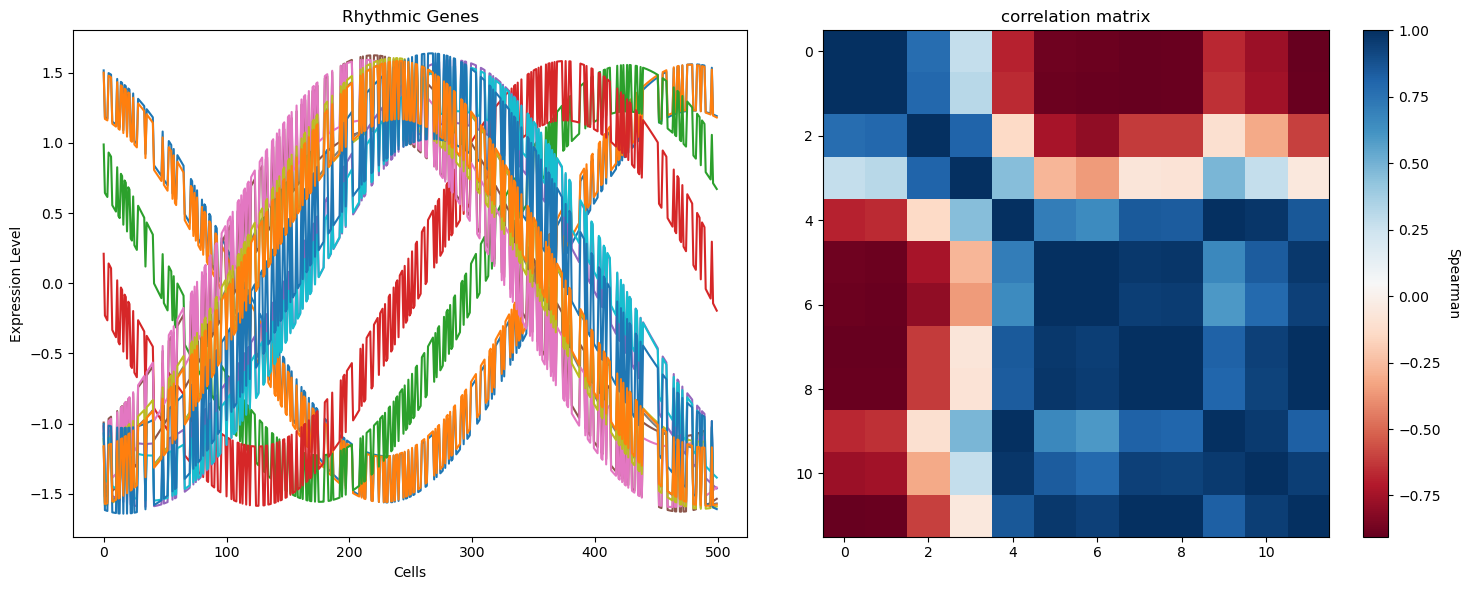

In [24]:
import scipy
emat = adata2.X.T[n_genes:n_genes + n_new_genes,:]
np.savetxt("/Users/henryhollis/Desktop/noise_matrix.csv", emat, delimiter=",")

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot rhythmic genes
axes[0].set_title('Rhythmic Genes')
for i in range(0,12):
    axes[0].plot( emat[i, :], label=f'Gene_{i + 1}')
axes[0].set_xlabel('Cells')
axes[0].set_ylabel('Expression Level')

# Plot correlation matrix:
corr_mat = np.array(scipy.stats.spearmanr(emat.T))[0,:,:]

axes[1].set_title('correlation matrix')
im = axes[1].imshow(corr_mat, cmap = "RdBu")
# Add the color bar
cbar = axes[1].figure.colorbar(im, ax = axes[1])
#axes[1].legend()
cbar.ax.set_ylabel("Spearman", rotation = -90, va = "bottom")

plt.tight_layout()

# Show the plot
plt.show()


**Show Reference Matrix**

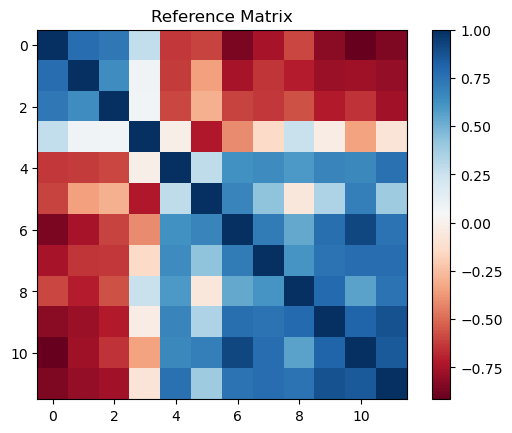

CCD: 2.5933371030232046
2.5933371030232046


In [25]:
import math
refmat = np.array([[1.0000000,  0.77547090,  0.72492855,  0.27817942, -0.63637681, -0.60375141, -0.8614806, -0.7471112, -0.59455286, -0.8234182, -0.9146447, -0.8473980],
                        [0.7754709,  1.00000000,  0.63439613,  0.07402797, -0.62632300, -0.34987550, -0.7461844, -0.6450780, -0.70865725, -0.7845410, -0.7654845, -0.7983427],
                        [0.7249286,  0.63439613,  1.00000000,  0.06541974, -0.59727560, -0.30024636, -0.6031795, -0.6364953, -0.56958405, -0.7144612, -0.6455111, -0.7595101],
                        [0.2781794,  0.07402797,  0.06541974,  1.00000000, -0.01245765, -0.72253596, -0.4099044, -0.1411756,  0.25538496, -0.0252816, -0.3401805, -0.0781101],
                        [-0.6363768, -0.62632300, -0.59727560, -0.01245765,  1.00000000,  0.28367324,  0.6234166,  0.6454257,  0.59510653,  0.6712806,  0.6618797,  0.7597038],
                        [-0.6037514, -0.34987550, -0.30024636, -0.72253596,  0.28367324,  1.00000000,  0.6772739,  0.4242223, -0.06776682,  0.3366267,  0.6955807,  0.3810191],
                        [-0.8614806, -0.74618443, -0.60317949, -0.40990436,  0.62341661,  0.67727389,  1.0000000,  0.7132144,  0.52923596,  0.7673822,  0.9111478,  0.7487607],
                        [-0.7471112, -0.64507795, -0.63649530, -0.14117556,  0.64542570,  0.42422234,  0.7132144,  1.0000000,  0.60794410,  0.7467579,  0.7732704,  0.7756198],
                        [-0.5945529, -0.70865725, -0.56958405,  0.25538496,  0.59510653, -0.06776682,  0.5292360,  0.6079441,  1.00000000,  0.7868302,  0.5543211,  0.7530874],
                        [-0.8234182, -0.78454102, -0.71446119, -0.02528160,  0.67128060,  0.33662668,  0.7673822,  0.7467579,  0.78683019,  1.0000000,  0.8117621,  0.8738338],
                        [-0.9146447, -0.76548454, -0.64551113, -0.34018047,  0.66187971,  0.69558073,  0.9111478,  0.7732704,  0.55432112,  0.8117621,  1.0000000,  0.8443479],
                        [-0.8473980, -0.79834269, -0.75951011, -0.07811010,  0.75970381,  0.38101906,  0.7487607,  0.7756198,  0.75308740,  0.8738338,  0.8443479,  1.0000000]])

plt.imshow( refmat, cmap = "RdBu" )
plt.colorbar()
plt.title( "Reference Matrix" )
plt.show()
# print(emat)
print("CCD: {}".format(leidenalg.calcCCD(refmat, emat)))
def calcDist(r1, r2):
    tmp = r1-r2
    tmp = tmp ** 2
    return(math.sqrt(np.sum(tmp)))
def calcCCDsimple(ref, emat):
    upper_ref = np.triu(ref)
    corr_mat = np.array(scipy.stats.spearmanr(emat.T))[0,:,:]
    upper_corrmat = np.triu(corr_mat)
    return(calcDist(upper_corrmat, upper_ref))

print(calcCCDsimple(refmat, emat))

Using partition class:  <class 'louvain.VertexPartition.ModularityVertexPartition'>


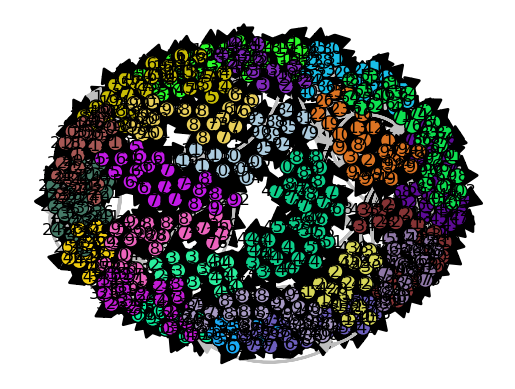

In [26]:
_, G2 = cluster_louvain(adata2, emat, refmat, partition_type= louvain.ModularityVertexPartition)  # You can adjust the 'resolution' parameter
membership_louvainStock = [int(i) for i in adata2.obs['louvainccd'].to_list()]
_plot(G2, membership_louvainStock, draw = "kk")

Using partition class:  <class 'louvain.VertexPartition.ccdModularityVertexPartition'>
Processing ccdModularityVertexPartition instance


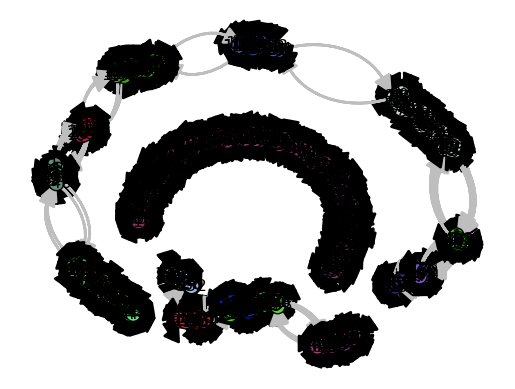

In [29]:
# Perform Louvain clustering
_, G = cluster_louvain(adata2, emat, refmat, partition_type= louvain.ccdModularityVertexPartition)  # You can adjust the 'resolution' parameter
membership = [int(i) for i in adata2.obs['louvainccd'].to_list()]
_plot(G, membership, draw = "kk")


/opt/miniconda3/envs/native/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/miniconda3/envs/native/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/miniconda3/envs/native/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt

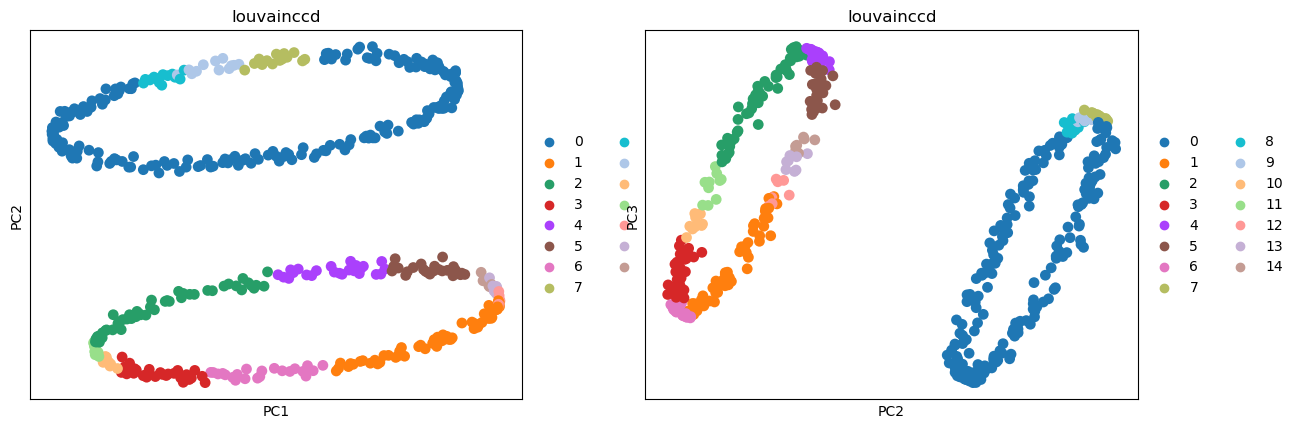

/opt/miniconda3/envs/native/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/miniconda3/envs/native/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


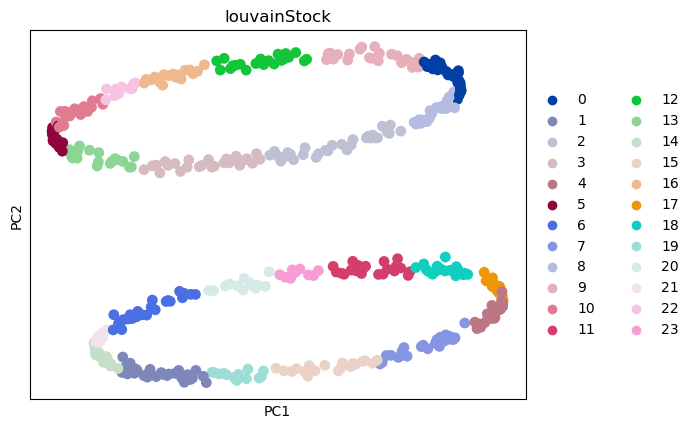

/opt/miniconda3/envs/native/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/miniconda3/envs/native/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/miniconda3/envs/native/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt

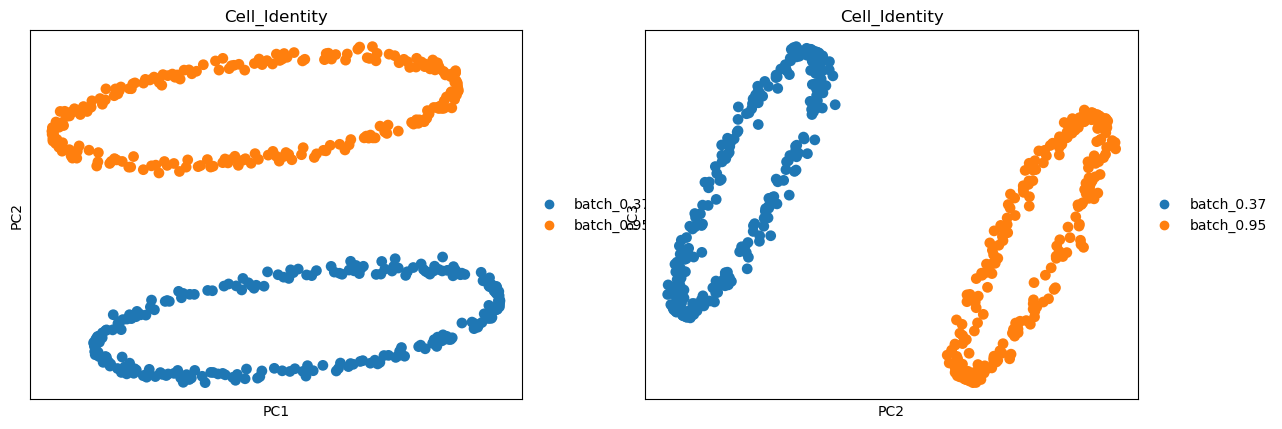

In [46]:
# Assuming you have an 'adata' object with Louvain cluster assignments

# Calculate UMAP
sc.tl.umap(adata2)

# Plot UMAP with Louvain clusters
# sc.pl.umap(adata2, color='louvainccd', legend_loc='on data')
# sc.pl.umap(adata2, color='Cell_Identity', legend_loc='on data')
sc.pl.pca(adata2, color= 'louvainccd' , components = ['1,2', '2,3'], show=True)
adata2.obs['louvainStock'] = [str(i) for i in membership_louvainStock]
sc.pl.pca(adata2, color = 'louvainStock', show = True)
sc.pl.pca(adata2, color='Cell_Identity', components=pcs_to_plot, show=True)


In [44]:
cluster_7_cells = [i for i in range(len(membership)) if membership[i] == 7]
print(cluster_7_cells)  
adata2.X[cluster_7_cells, :].shape

cluster_9_cells = [i for i in range(len(membership)) if membership[i] == 9]
print(cluster_9_cells) 
cluster_9_emat = adata2.X.T[n_genes:n_genes + n_new_genes,cluster_9_cells]
cluster_7_emat = adata2.X.T[n_genes:n_genes + n_new_genes,cluster_7_cells]

cluster_7_ccd = leidenalg.calcCCD(refmat, cluster_7_emat)
cluster_9_ccd = leidenalg.calcCCD(refmat, cluster_9_emat)

combined_emat = np.concatenate(( cluster_7_emat, cluster_9_emat), axis = 1)
combined_emat.shape
combined_ccd = leidenalg.calcCCD(refmat, combined_emat)
print("cluster 7 ccd {:.3f}".format(cluster_7_ccd))
print("cluster 9 ccd {:.3f}".format(cluster_9_ccd))
print("7 & 9 ccd {:.3f}".format(combined_ccd))


[356, 360, 362, 363, 365, 367, 369, 370, 371, 372, 373, 376, 379, 380]
[329, 334, 335, 337, 340, 345, 346, 348, 350, 351, 352, 354]
cluster 7 ccd 3.791
cluster 9 ccd 4.034
7 & 9 ccd 3.995


In [47]:
clusterA = 13
clusterB = 14
cluster_A_cells = [i for i in range(len(membership)) if membership[i] == clusterA]
print(cluster_A_cells)  

cluster_B_cells = [i for i in range(len(membership)) if membership[i] == clusterB]
print(cluster_B_cells)  
cluster_A_emat = adata2.X.T[n_genes:n_genes + n_new_genes,cluster_A_cells]
cluster_B_emat = adata2.X.T[n_genes:n_genes + n_new_genes,cluster_B_cells]

cluster_A_ccd = leidenalg.calcCCD(refmat, cluster_A_emat)
cluster_B_ccd = leidenalg.calcCCD(refmat, cluster_B_emat)

combined_emat = np.concatenate(( cluster_A_emat, cluster_B_emat), axis = 1)
combined_ccd = leidenalg.calcCCD(refmat, combined_emat)
print("cluster {} ccd {:.3f}".format(clusterA, cluster_A_ccd))
print("cluster {} ccd {:.3f}".format(clusterB, cluster_B_ccd))
print("{} & {} ccd {:.3f}".format(clusterA, clusterB, combined_ccd))


[461, 465, 466, 469, 470, 472, 473, 474]
[452, 453, 454, 459, 460, 462, 463]
cluster 13 ccd 7.943
cluster 14 ccd 6.952
13 & 14 ccd 6.992


In [ ]:
# from sklearn.metrics import adjusted_rand_score
# # Extract true labels
# true_labels = adata2.obs['Cell_Identity'].values

# # Extract Louvain clusters
# louvain_clusters = adata2.obs['louvain'].astype(str).values

# # Calculate Adjusted Rand Index
# ari = adjusted_rand_score(true_labels, louvain_clusters)

# # Print the ARI
# print("Adjusted Rand Index:", ari)